<p style="font-family: Arial; font-size:2.75em;color:purple; font-style:bold; text-align:left">
<br>K Means Clustering</p></br>
<p style="font-family: Arial; font-size:1.00em;color:purple; font-style:bold; text-align:left">
<br>Author: Kumar Rahul</p></br>
<p style="font-family: Arial; font-size:0.75em;color:purple; font-style:bold; text-align:left">
<br>Date: "6/9/2017"</p></br>

<p style="font-family: Arial; font-size:1.5em;color:green; font-style:bold; text-align:left">
<br>Import the libraries</p></br>

In [1]:
library(stats) # for kmeans  and hclust
library(cluster) #for silhoutee plot

<p style="font-family: Arial; font-size:1.5em;color:green; font-style:bold; text-align:left">
<br>Preparing Data</p></br>

Read data from a specified location.


In [2]:
car_df <- read.csv("/Users/Rahul/Documents/Datasets/Kmeans_Car data.csv", header = TRUE,sep = ",",
                     na.strings = c(""," ", "NA"))

<p style="font-family: Arial; font-size:1.5em;color:green; font-style:bold; text-align:left">
<br>Summary of the data on which model is built and Standardizing the variables</p></br>

Information on the car metadata. column 3 to column 5 contains numeric data. In case of any other dataset change the column numbers accordingly

In [3]:
str(car_df) 
car_df <- na.omit(car_df) # listwise deletion of missing values
car_scaled_df <- scale(car_df[,3:5]) # standardize variables

'data.frame':	1008 obs. of  17 variables:
 $ Brand           : Factor w/ 41 levels "Ashok Leyland",..: 38 38 38 38 38 38 38 38 38 38 ...
 $ Car.Models      : Factor w/ 1008 levels "Ambassador CLASSIC 1500 DSL",..: 850 849 842 846 845 840 848 847 841 851 ...
 $ Price..INR.     : int  141898 145000 150000 171489 191125 198000 198605 216238 223500 237831 ...
 $ Mileage         : num  25.4 25.4 25.4 25.4 25.4 25.4 25.4 25.4 25.4 25.4 ...
 $ Seating.Capacity: int  4 4 4 4 4 4 4 4 4 4 ...
 $ Vehicle.Type    : Factor w/ 9 levels "Convertible",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ Fuel.Type       : Factor w/ 5 levels "CNG","Diesel",..: 5 5 5 5 5 5 5 5 5 5 ...
 $ Transmission    : Factor w/ 2 levels "Automatic","Manual": 2 2 2 2 2 2 2 2 2 2 ...
 $ Parking.Sensor  : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ Airbag          : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ Cruise.Control  : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ Keyless.Entry   : Factor w/ 2 

### Using euclidean as distance measure for k means clustering

The Euclidian distance between any two observations within the cluster will be lesser than the observations between clusters. This is used to derive ideal number of clusters and quality of clusters. 

Some of the metrics using this information is Calinski and Harabasz Index (CH Index). 

CH(k) = [{B(k)/(k-1)}/{W(k)/(n-k)}]

Where CH(k) is the Calinski and Harabasz index with k-clusters (k > 1), B(k) and W(k) are the between and within clusters sum of squared variations with k clusters.The optimal K value is the one with maximum CH Index.

The other statistics which can be used is Silhouette width. Let a(i) be the average distance between an observation i and other points in the cluster to which observation i belongs.  Let b(i) be the minimum average distance between observation i and observations in other clusters.  Then the Silhouette statistic is defined by:

S(i) = [{b(i)-a(i)}/Max{a(i),b(i)}]

A higher value of S(i) indicates better clustering.


The loop is to demonstrate the use of making different number of clsuters. Here the loop is through 2 to 10. This implies that the code chunk is making two clusters to ten clusters. **Set seed is important to get a repeatable solution all the time.**

In [4]:
temp_car_df <- car_df[,1:5]
distance_metric <-  dist(car_scaled_df, method = "euclidean") # distance matrix
for (i in 2:10) {
  #set.seed(1234)
  kmeans_model <- kmeans(car_scaled_df, centers=i, iter.max = 10)
  
  #silhouette statistics as a measure of quality of clusters
  sil_width  <- silhouette(kmeans_model$cluster, distance_metric)
  summary.sil_width <- summary(sil_width)
  
  #CH Index as a measure of quality of cluter
  temp1 <- kmeans_model$betweenss/(i-1)
  temp2 <- kmeans_model$tot.withinss/(1008-i)
  ch_index <-  temp1/temp2
  
  #Append the silhouette stats and CH index along with cluster number.
  cluster_member <- cbind(kmeans_model$cluster,sil_width[,3],summary.sil_width$avg.width,ch_index)
  colnames(cluster_member)[1] <- paste("ClusterOf",i)
  colnames(cluster_member)[2] <- paste("SilWidth-",i)
  colnames(cluster_member)[3] <- paste("AvgClusterWidth-",i)
  colnames(cluster_member)[4] <- paste("CHIndex-",i)
  temp_car_df <- data.frame(temp_car_df,cluster_member)
  #print(temp_car_df)
}

### Plot the result: Silhouette plot to visulaize the clusters

*kmeans_models* from above code chunk is being used. Since it is a loop through in the above code. K = 10 is being used in below code chunk.

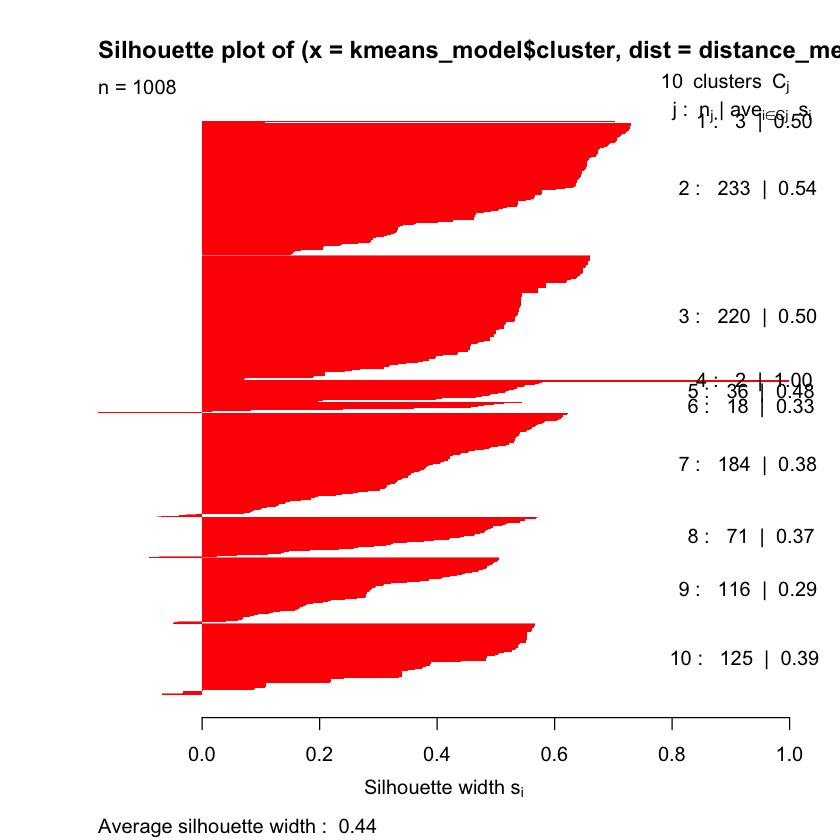

In [5]:
distance_metric <-  dist(car_scaled_df, method = "euclidean") # distance matrix
#d <- daisy(car_scaled_df, metric = c("euclidean")) #can use daisy as well
sil_width   <- silhouette(kmeans_model$cluster, distance_metric)
plot(sil_width, col = "red")

### Write the result to csv

In [6]:
getwd()

[1] "/Users/Rahul/Documents/Rahul Office/IIMB/Work @ IIMB/Training Material/Concepts/R files/R_clustering/PYNB"

In [7]:
write.csv(temp_car_df, "kmeans-analysis.csv") #export to excel

The above code chunk which loops through to generate 2:10 clusters, fixes the number of iteration to 10. However, the centriod movement may not have stopped in 10 iterations. In order to iterate and find the optimal cluster assigment for a fixed number of (K - cluster)

In [ ]:
temp_car_df <- car_df[,1:5]
distance_metric <-  dist(car_scaled_df, method = "euclidean") # distance matrix
ch_index <- c()
temp1 <- c()
temp2 <- c()
for (i in 5:1500){
  #set.seed(1234)
  kmeans_model <- kmeans(car_scaled_df, centers=5, iter.max = i)
  
  #CH Index as a measure of quality of cluter
  temp1[i-4] <- kmeans_model$betweenss/(5-1)
  temp2[i-4] <- kmeans_model$tot.withinss/(1008-5)
  ch_index[i-4] <-  temp1[i-4]/temp2[i-4]
  if(i>5){
  if (abs(ch[i-4-1] - ch[i-4]) <= 0.0001){
    final_ch_index <- ch[i-4]
    break
  }
  }
} 
  #Append the silhouette stats and CH index along with cluster number.
  cluster_member <- cbind(kmeans_model$cluster,final_ch_index)
  colnames(cluster_member)[1] <- paste("ClusterOf",5)
  colnames(cluster_member)[2] <- paste("CHIndex-",5)
  temp_car_df <- data.frame(temp_car_df,cluster_member)
  #print(temp_car_df)